<a href="https://colab.research.google.com/github/dcheung11/macaisociety-social-bike-forecasting/blob/main/bikeshare_data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bike Forecasting


Imports


In [ ]:
# pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# Import NumPy
import numpy as np

# pip install pandas
import pandas as pd

# pip install seaborn
import seaborn as sns

# pip install matplotlib
import matplotlib.pyplot as plt

# pip install -U scikit-learn
# Used to split data into training and test data
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Multiple math functions
from tensorflow import math

from keras.utils.vis_utils import plot_model

# Test if using TensorFlow GPU
if(tf.config.list_physical_devices('GPU')):
    print("Yes")

Download Data and Read

In [ ]:
# read the bike share csv
# url_jan = "https://raw.githubusercontent.com/dcheung11/MacAI-SocialBicycle-Forecasting/main/Bike%20share%20ridership%202022-01.csv"
# url_feb = "https://raw.githubusercontent.com/dcheung11/MacAI-SocialBicycle-Forecasting/main/Bike%20share%20ridership%202022-02.csv"
# url_mar = "https://raw.githubusercontent.com/dcheung11/MacAI-SocialBicycle-Forecasting/main/Bike%20share%20ridership%202022-03.csv"

url_01_21 = "https://raw.githubusercontent.com/dcheung11/Bikeshare-Forecast/main/bikeshare-ridership-2021/Bike%20share%20ridership%202021-01.csv"
url_02_21 = "https://raw.githubusercontent.com/dcheung11/Bikeshare-Forecast/main/bikeshare-ridership-2021/Bike%20share%20ridership%202021-02.csv"
url_03_21 = "https://raw.githubusercontent.com/dcheung11/Bikeshare-Forecast/main/bikeshare-ridership-2021/Bike%20share%20ridership%202021-03.csv"
url_04_21 = "https://raw.githubusercontent.com/dcheung11/Bikeshare-Forecast/main/bikeshare-ridership-2021/Bike%20share%20ridership%202021-04.csv"
url_05_21 = "https://raw.githubusercontent.com/dcheung11/Bikeshare-Forecast/main/bikeshare-ridership-2021/Bike%20share%20ridership%202021-05.csv"
url_06_21 = "https://raw.githubusercontent.com/dcheung11/Bikeshare-Forecast/main/bikeshare-ridership-2021/Bike%20share%20ridership%202021-06.csv"
# url_07_21 = "https://raw.githubusercontent.com/dcheung11/Bikeshare-Forecast/main/bikeshare-ridership-2021/Bike%20share%20ridership%202021-07.csv"
# url_08_21 = "https://raw.githubusercontent.com/dcheung11/Bikeshare-Forecast/main/bikeshare-ridership-2021/Bike%20share%20ridership%202021-08.csv"
# url_09_21 = "https://raw.githubusercontent.com/dcheung11/Bikeshare-Forecast/main/bikeshare-ridership-2021/Bike%20share%20ridership%202021-09.csv"
# url_10_21 = "https://raw.githubusercontent.com/dcheung11/Bikeshare-Forecast/main/bikeshare-ridership-2021/Bike%20share%20ridership%202021-10.csv"
# url_11_21 = "https://raw.githubusercontent.com/dcheung11/Bikeshare-Forecast/main/bikeshare-ridership-2021/Bike%20share%20ridership%202021-11.csv"
# url_12_21 = "https://raw.githubusercontent.com/dcheung11/Bikeshare-Forecast/main/bikeshare-ridership-2021/Bike%20share%20ridership%202021-12.csv"
# Define a list of CSV file URLs
# df = pd.read_csv(url_jan_21,encoding='cp1252')
urls=[url_01_21,url_02_21,url_03_21,url_04_21,
      url_05_21,url_06_21
      # ,url_07_21,url_08_21,
      # url_09_21,url_10_21,url_11_21,url_12_21
      ]
# Load the CSV files into separate DataFrames
dfs = [pd.read_csv(u,encoding='cp1252') for u in urls]
dfs_cleaned=[]

# Column mistitle Data cleaning 
for i in dfs:
  if "ï»¿Trip Id" in i.columns:
    i = i.drop(columns= "ï»¿Trip Id")
  else:
    i = i.drop(columns= "Trip Id")
  dfs_cleaned.append(i)
# Concatenate the DataFrames into a single DataFrame
df = pd.concat(dfs_cleaned)
# Check and filter nans in columns
df.isna().sum()
df = df.dropna()
# Show the first rows
df.tail()

,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type
452642,533,7475,06/30/2021 23:59,Jarvis St / Richmond St E,7102.0,07/01/2021 00:07,Nelson St / Duncan St,3915.0,Annual Member
452643,764,7143,06/30/2021 23:59,Kendal Ave / Bernard Ave,7192.0,07/01/2021 00:12,Harbord St / Clinton St,353.0,Annual Member
452644,635,7169,06/30/2021 23:59,Front St W / Bay St (North Side),7160.0,07/01/2021 00:10,King St W / Tecumseth St,810.0,Annual Member
452645,933,7523,06/30/2021 23:59,Lynn Williams St / East Liberty St - SMART,7017.0,07/01/2021 00:15,Widmer St / Adelaide St W,956.0,Annual Member
452646,699,7049,06/30/2021 23:59,Queen St W / Portland St,7008.0,07/01/2021 00:11,Wellesley St / Queen's Park Cres,5299.0,Annual Member


Check the non-numeric types


In [ ]:
# Show the columns and types
df.dtypes
# For now, the important columns we'll need to use are start/end times and stations for our model. 

Trip  Duration          int64
Start Station Id        int64
Start Time             object
Start Station Name     object
End Station Id        float64
End Time               object
End Station Name       object
Bike Id               float64
User Type              object
dtype: object

Delete unneeded columns

In [ ]:
# delete columns
df.drop(['User Type', 'Bike Id', "Start Station Name", "End Station Name", "Trip  Duration"], axis=1, inplace=True)

Converting Time data to numeric

In [ ]:
# Convert the Start Time and End Time columns to datetime objects
df['Start Time'] = pd.to_datetime(df['Start Time'], format='%m/%d/%Y %H:%M')
df['End Time'] = pd.to_datetime(df['End Time'], format='%m/%d/%Y %H:%M')

# Extract additional features from the datetime objects if needed
df['Month'] = df['Start Time'].dt.month
df['Start Hour'] = df['Start Time'].dt.hour
df['Day'] = df['Start Time'].dt.day
df['Day Name'] = df['Start Time'].dt.day_name()
df['End Hour'] = df['End Time'].dt.hour
df['End Station Id'] = df['End Station Id'].astype('int')

# Day of week info: day 0 == Monday, month 1 == January

One Hot Encoding for the stations

In [ ]:
# One hot encoding the start and end station IDs:
df_encoded = pd.get_dummies(df, columns=['Start Station Id', 'End Station Id'])
df_encoded.drop(['Start Time', 'End Time'], axis=1, inplace=True)

In [ ]:
df_encoded.tail()

,Month,Start Hour,Day,Day Name,End Hour,Start Station Id_7000,Start Station Id_7001,Start Station Id_7002,Start Station Id_7003,Start Station Id_7004,...,End Station Id_7660,End Station Id_7662,End Station Id_7663,End Station Id_7664,End Station Id_7665,End Station Id_7666,End Station Id_7667,End Station Id_7668,End Station Id_7670,End Station Id_7671
452642,6,23,30,Wednesday,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
452643,6,23,30,Wednesday,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
452644,6,23,30,Wednesday,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
452645,6,23,30,Wednesday,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
452646,6,23,30,Wednesday,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now we have a numeric, encoded data frame:

In [ ]:
# Creating a data frame for the hourly arrivals and departueres for each station

#Split df at when the end columns start, so make a df for start stations and another df for end stations
columns = list(df_encoded)
departures_grouped = pd.DataFrame()
arrivals_grouped = pd.DataFrame()

# Create df with just the Start/End Station sums for each time interval
for i in columns:
  if i[0:7] == 'Start S':
    departures_grouped = pd.concat([departures_grouped, df_encoded.groupby(['Month', 'Day', 'Start Hour'])[i].sum()], axis=1)
    # departures_grouped = pd.concat([departures_grouped, df_encoded.groupby(['Day'])[i].sum()], axis=1)
  if i[0:5] == 'End S':
    arrivals_grouped = pd.concat([arrivals_grouped, df_encoded.groupby(['Month', 'Day', 'Start Hour'])[i].sum()], axis=1)
    # arrivals_grouped = pd.concat([arrivals_grouped, df_encoded.groupby(['Day'])[i].sum()], axis=1)


departures_grouped.head()


Start Station Id_7000  Start Station Id_7001  Start Station Id_7002  \
1 1 0                      0                      1                      0   
    1                      0                      0                      0   
    2                      0                      0                      0   
    3                      0                      0                      0   
    4                      0                      0                      0   

       Start Station Id_7003  Start Station Id_7004  Start Station Id_7005  \
1 1 0                      1                      0                      0   
    1                      0                      0                      0   
    2                      1                      0                      0   
    3                      0                      0                      0   
    4                      0                      0                      0   

       Start Station Id_7006  Start Station Id_7007  Start Station Id_7008  \
1 1 0                      2                      0                      0   
    1                      1                      0                      1   
    2                      0                      1                      1   
    3                      0                      0                      0   
    4                      0                      0                      0   

       Start Station Id_7009  ...  Start Station Id_7660  \
1 1 0                      0  ...                      0   
    1                      0  ...                      0   
    2                      0  ...                      0   
    3                      0  ...                      0   
    4                      0  ...                      0   

       Start Station Id_7662  Start Station Id_7663  Start Station Id_7664  \
1 1 0                      0                      0                      0   
    1                      0                      0                      0   
    2                      0                      0                      0   
    3                      0                      0                      0   
    4                      0                      0                      0   

       Start Station Id_7665  Start Station Id_7666  Start Station Id_7667  \
1 1 0                      0                      0                      0   
    1                      0                      0                      0   
    2                      0                      0                      0   
    3                      0                      0                      0   
    4                      0                      0                      0   

       Start Station Id_7668  Start Station Id_7670  Start Station Id_7671  
1 1 0                      0                      0                      0  
    1                      0                      0                      0  
    2                      0                      0                      0  
    3                      0                      0                      0  
    4                      0                      0                      0  

[5 rows x 613 columns]

In [ ]:
departures_grouped

Start Station Id_7000  Start Station Id_7001  Start Station Id_7002  \
1 1  0                       0                      1                      0   
     1                       0                      0                      0   
     2                       0                      0                      0   
     3                       0                      0                      0   
     4                       0                      0                      0   
...                        ...                    ...                    ...   
6 30 19                      3                      6                      2   
     20                      7                      7                      4   
     21                     10                      4                      1   
     22                      4                      1                      1   
     23                      1                      4                      0   

         Start Station Id_7003  Start Station Id_7004  Start Station Id_7005  \
1 1  0                       1                      0                      0   
     1                       0                      0                      0   
     2                       1                      0                      0   
     3                       0                      0                      0   
     4                       0                      0                      0   
...                        ...                    ...                    ...   
6 30 19                      2                      1                      1   
     20                      0                      0                      3   
     21                      2                      0                      2   
     22                      2                      0                      4   
     23                      1                      1                      1   

         Start Station Id_7006  Start Station Id_7007  Start Station Id_7008  \
1 1  0                       2                      0                      0   
     1                       1                      0                      1   
     2                       0                      1                      1   
     3                       0                      0                      0   
     4                       0                      0                      0   
...                        ...                    ...                    ...   
6 30 19                      7                      2                      2   
     20                     12                      3                      3   
     21                      3                      2                      3   
     22                      8                      3                      1   
     23                      4                      1                      2   

         Start Station Id_7009  ...  Start Station Id_7660  \
1 1  0                       0  ...                      0   
     1                       0  ...                      0   
     2                       0  ...                      0   
     3                       0  ...                      0   
     4                       0  ...                      0   
...                        ...  ...                    ...   
6 30 19                      0  ...                      0   
     20                      0  ...                      6   
     21                      2  ...                      2   
     22                      1  ...                      0   
     23                      0  ...                      0   

         Start Station Id_7662  Start Station Id_7663  Start Station Id_7664  \
1 1  0                       0                      0                      0   
     1                       0                      0                      0   
     2                       0                      0                      0   
     3                       0                      0        

In [ ]:
#check for useless columns
departure_cols = []
arrival_cols = []

# Create common columns by Station ID number
for i in departures_grouped.columns:
  id = i[-4:]
  departure_cols.append(id)
for j in arrivals_grouped.columns:
  id = j[-4:]
  arrival_cols.append(id)

# Arrival,Departure Columns to drop due to NaN
arrival_columns_to_drop = ["End Station Id_" + i for i in arrival_cols if i not in departure_cols]
departure_columns_to_drop = ["Start Station Id_" + i for i in departure_cols if i not in arrival_cols]
print(arrival_columns_to_drop)
print(departure_columns_to_drop)

# for i in arrival_cols:
#   if i not in departure_cols:
#     print("1:" + i)

# for i in departure_cols:
#   if i not in arrival_cols:
#     print(i)

arrivals_grouped_cleaned = arrivals_grouped.drop(columns=arrival_columns_to_drop)
departures_grouped_cleaned = departures_grouped.drop(columns=departure_columns_to_drop)


['End Station Id_7394', 'End Station Id_7638']
[]


In [ ]:
len(arrivals_grouped_cleaned.columns)
len(departures_grouped_cleaned.columns)
a = list(arrivals_grouped_cleaned.columns)
b = list(departures_grouped_cleaned.columns)
# Common columns for arr and dep
c = []


for i in range(len(a)):
  c.append(a[i][-4:])

# Changing type to int16
arrivals_cleaned = arrivals_grouped_cleaned.set_axis(c, axis = 1, copy = False).astype(np.int16)
departures_cleaned = departures_grouped_cleaned.set_axis(c, axis = 1, copy = False).astype(np.int16)

final = pd.DataFrame(arrivals_cleaned - departures_cleaned)

daysofweek = [
    'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 
    'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
    'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
    'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
    'Saturday', 'Sunday', 'Monday']

# final.insert(0, "DaysOfWeek", daysofweek)
# final.head(24*11)
final2 = final.reset_index()
final2 = final2.drop(columns=['level_0', 'level_1'])
final2

,level_2,7000,7001,7002,7003,7004,7005,7006,7007,7008,...,7660,7662,7663,7664,7665,7666,7667,7668,7670,7671
0,0,0,0,2,-1,0,0,-1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,-1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,1,0,0,2,0,1,1,-1,...,0,0,0,0,0,0,0,0,0,0
3,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4327,19,2,-4,2,-2,0,0,2,3,-2,...,1,0,0,0,0,0,0,3,-1,0
4328,20,1,0,-1,1,0,-3,-4,0,2,...,-6,-1,0,0,0,0,0,-4,0,0
4329,21,1,-3,1,-2,1,-2,4,0,-2,...,2,-1,0,0,0,0,1,4,0,0
4330,22,3,0,4,1,1,-4,-5,1,0,...,3,0,1,0,0,0,0,0,0,-1


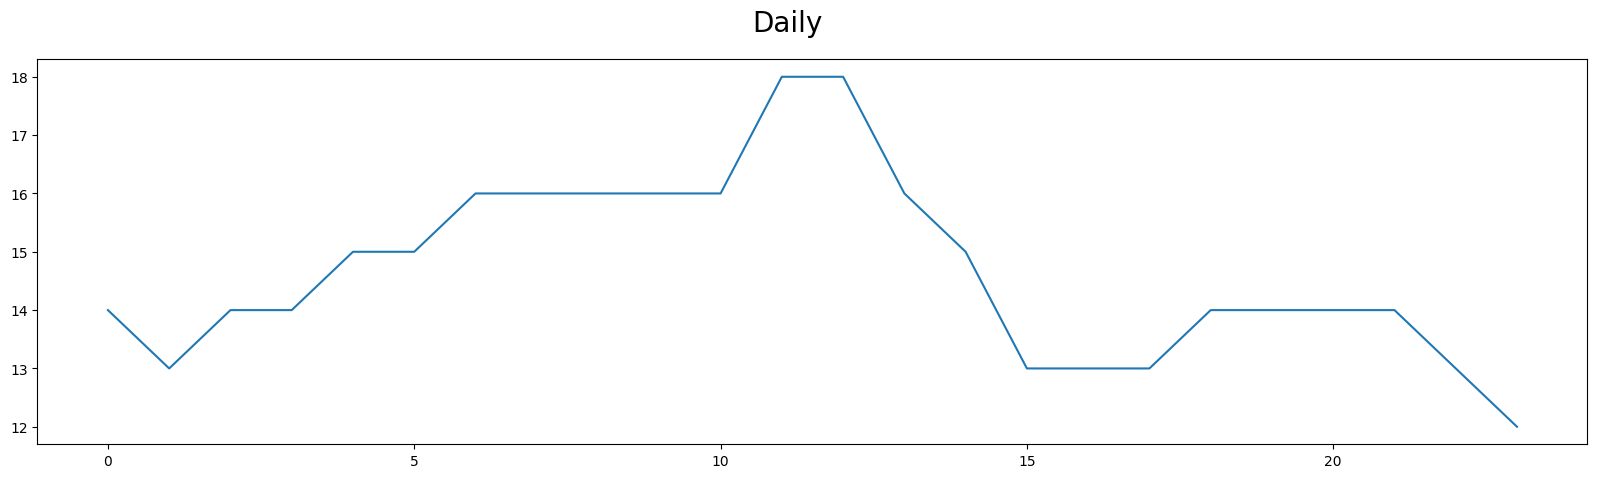

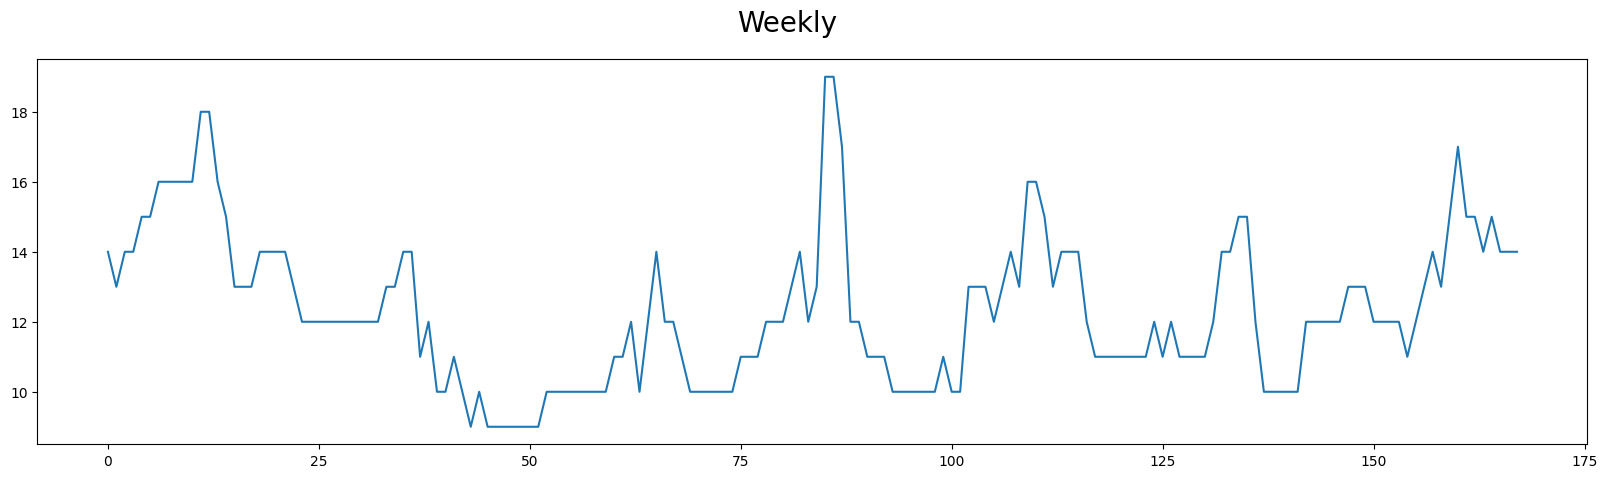

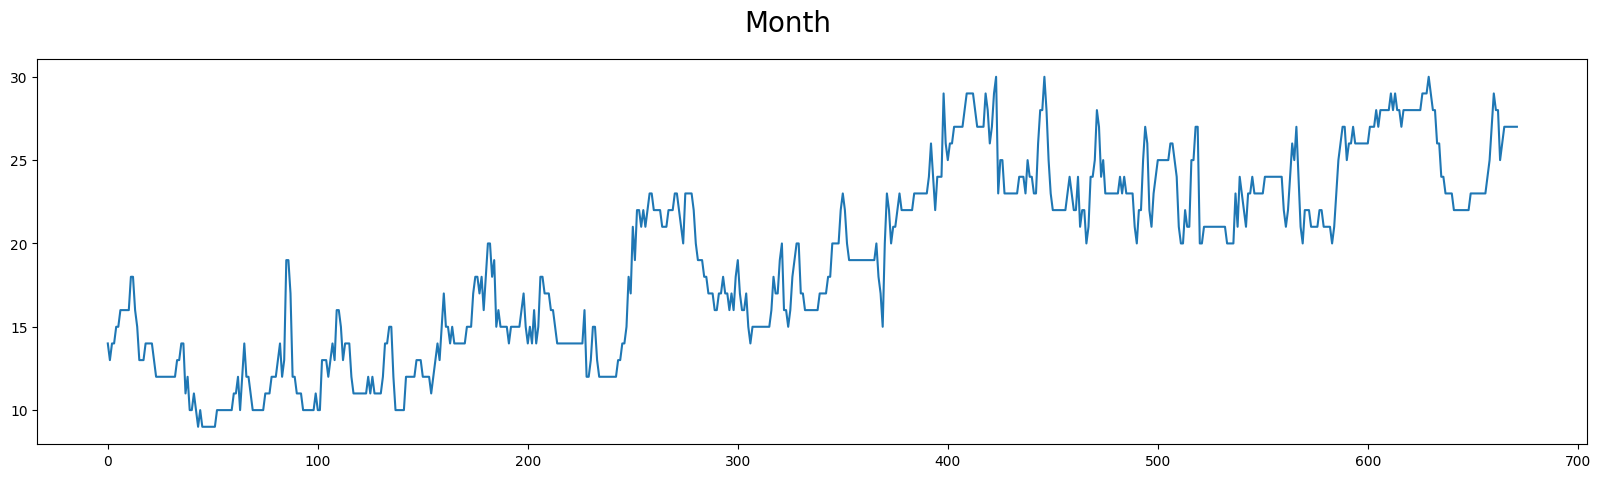

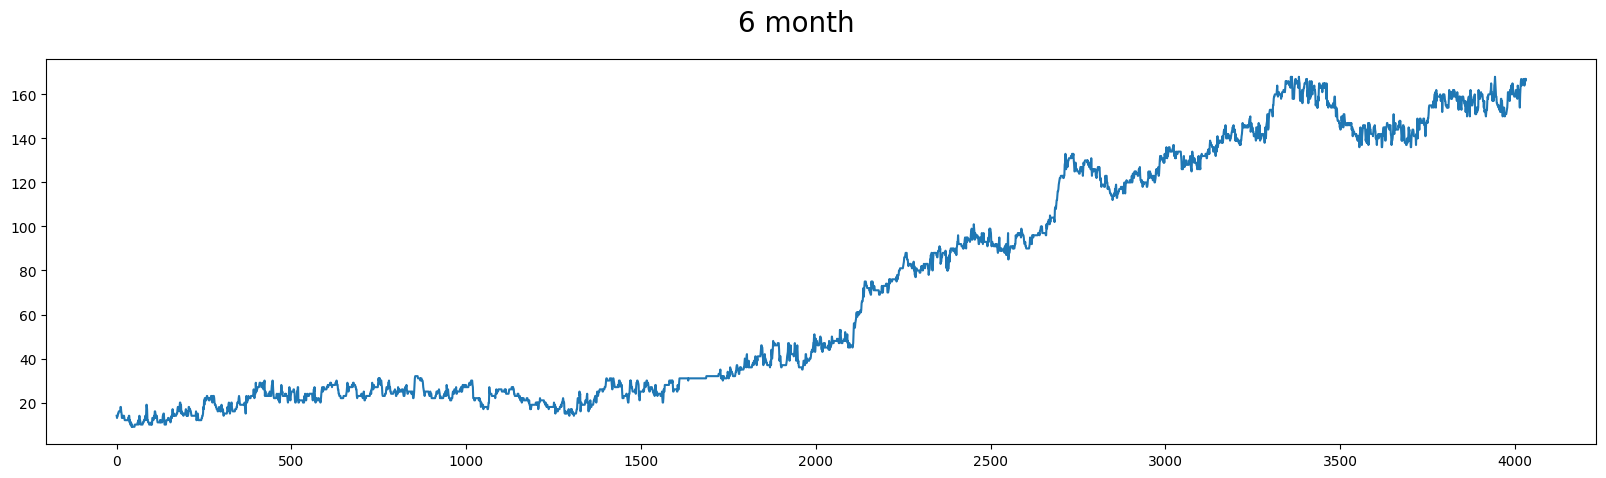

In [ ]:
# One
station_id = "7006"
df_subset = pd.DataFrame(final2,columns = [station_id]) 
starting_bikes=15
# Calculate actual number of bikes
df_subset['actual_bikes'] = df_subset[station_id].cumsum() + starting_bikes
df_subset = df_subset.drop(columns=[station_id])

# df_subset.head()
# df_subset = final2.iloc[:, 0:1]
plt.figure(figsize=(20,5)).suptitle("Daily", fontsize=20)
plt.plot(df_subset.head(24))
plt.show()
plt.figure(figsize=(20,5)).suptitle("Weekly", fontsize=20)
plt.plot(df_subset.head(24*7))
plt.show()
plt.figure(figsize=(20,5)).suptitle("Month", fontsize=20)
plt.plot(df_subset.head(24*7*4))
plt.show()
plt.figure(figsize=(20,5)).suptitle("6 month", fontsize=20)
plt.plot(df_subset.head(24*7*4*6))
plt.show()



Prep


In [ ]:
from sklearn.preprocessing import StandardScaler

print("Request Range before scaling : ", min(df_subset.actual_bikes), max(df_subset.actual_bikes))
scaler = StandardScaler()
scaled_requests = scaler.fit_transform(df_subset)
print("Request Range after scaling : ", min(scaled_requests), max(scaled_requests))


# Training data has to be sequential: We choose first 5 months
train_size = 24*7*4*5

# number of samples to Lookback for
lookback = 24*7*2

# Training data
training_data = scaled_requests[0:train_size, :]

# Testing data
testing_data = scaled_requests[train_size-lookback:, :]

print("Shape of Train, Test: ", 
      training_data.shape,
      testing_data.shape
      )

Request Range before scaling :  9 193
Request Range after scaling :  [-1.22333625] [1.91660832]
Shape of Train, Test:  (3360, 1) (1308, 1)


LSTM Model

In [ ]:

# Prep RNN dataset
# Each datapoint X is linked to the previous "lookback" datapoints 
# The predicted value Y is the next point
def create_rnn_dataset(data, lookback=1):
  data_x, data_y = [],[]
  for i in range(len(data)-lookback-1):
    a = data[i:(i+lookback), 0]
    data_x.append(a)
    data_y.append(data[i+lookback, 0])
  return np.array(data_x), np.array(data_y)

# Creating X,Y for training
train_x, train_y = create_rnn_dataset(training_data,lookback)

# Reshape for use with LSTM
train_x = np.reshape(train_x, 
                     (train_x.shape[0], 1, train_x.shape[1]))
print("Shapes of X,Y: ", train_x.shape, train_y.shape)

Shapes of X,Y:  (3023, 1, 336) (3023,)


Keras Model


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM,Dense


tf.random.set_seed(3)

# Keras Model
ts_model = Sequential()
ts_model.add(LSTM(256, input_shape=(1,lookback)))
ts_model.add(Dense(1))

# Compile with Adam Optimizer
ts_model.compile(loss = "mean_squared_error",
                 optimizer = "adam",
                 metrics= ["mae"]
                 )
# Print summary
ts_model.summary()

# Train the model
ts_model.fit(train_x, train_y, 
             epochs=5,batch_size=1,verbose=1)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 256)               607232    
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 607,489
Trainable params: 607,489
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
3023/3023 [==============================] - 31s 9ms/step - loss: 0.0180 - mae: 0.0895
Epoch 2/5
3023/3023 [==============================] - 28s 9ms/step - loss: 0.0089 - mae: 0.0703
Epoch 3/5
3023/3023 [==============================] - 27s 9ms/step - loss: 0.0085 - mae: 0.0689
Epoch 4/5
3023/3023 [==============================] - 27s 9ms/step - loss: 0.0079 - mae: 0.0648
Epoch 5/5
3023/3023 [==============================] - 2

Testing Model

In [ ]:
# Creating X,Y for testing
test_x, test_y = create_rnn_dataset(testing_data, lookback)

# Reshape for use with LSTM
test_x = np.reshape(test_x, 
                     (test_x.shape[0], 1, test_x.shape[1]))

# Evaluate Model
ts_model.evaluate(test_x, test_y, verbose = 1)

# Predict for training data
predict_on_training = ts_model.predict(train_x)
# Predict for testing data
predict_on_testing = ts_model.predict(test_x)

# Inverse the scaling to see results
predict_on_training = scaler.inverse_transform(predict_on_training)
predict_on_testing = scaler.inverse_transform(predict_on_testing)

31/31 [==============================] - 0s 3ms/step


Plot Predictions

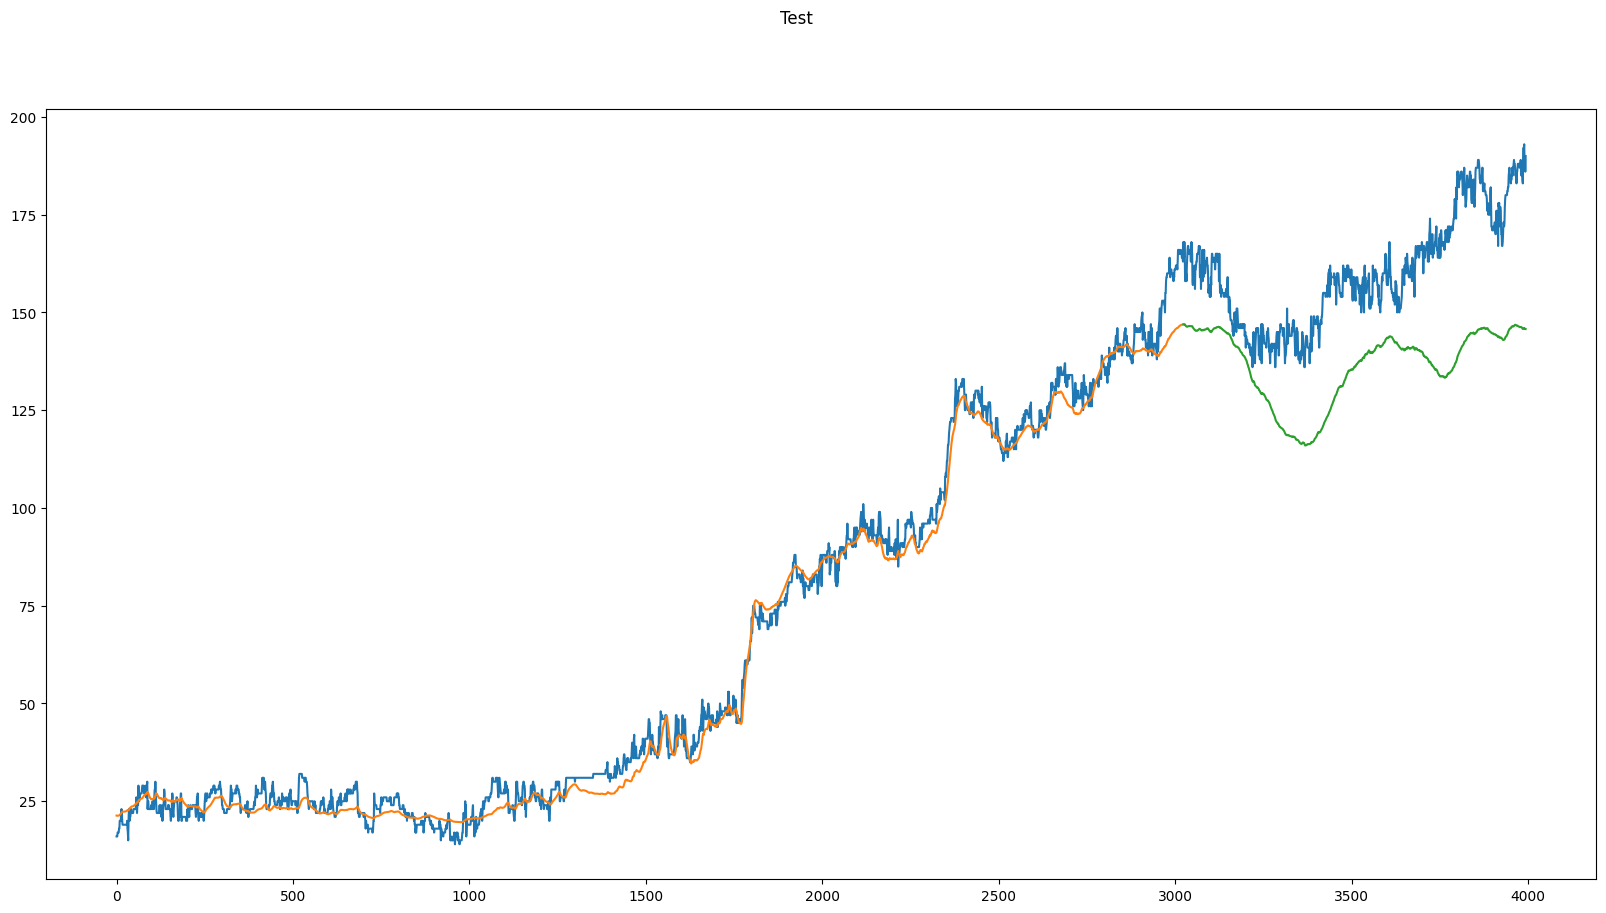

In [ ]:
# Total Size 
total_size = len(predict_on_training) + len(predict_on_testing)

# plot original data
original_data = df_subset.actual_bikes.to_numpy()
original_data = original_data.reshape(len(original_data), 1)

original_plot = np.empty((total_size,1))
original_plot[:,:] = np.nan
original_plot[0:total_size,:] = original_data[lookback: -2,]

# predict training plot
predict_training_plot = np.empty((total_size,1))
predict_training_plot[:,:] = np.nan
predict_training_plot[0:len(predict_on_training),:] = predict_on_training

# predict testing plot
predict_testing_plot = np.empty((total_size,1))
predict_testing_plot[:,:] = np.nan
predict_testing_plot[len(predict_on_training): total_size,:] = predict_on_testing

# plot

plt.figure(figsize=(20,10)).suptitle("Test")
plt.plot(original_plot)
plt.plot(predict_training_plot)
plt.plot(predict_testing_plot)
plt.show()